# FashionNet

Welcome to the final assignment in this course. It's been a long journey, but you are now ready to unleash the powers of neural networks at any task. In this assignment, we will be working with a collection of apparel and accessories images. Big online retailers routinely have to classify images provided by third-parties. Your task is to build a neural network that can classify theese images into one of 10 classes with the highest possible accuracy, and document your model's salient properties.

This assignment can be divided into the following sections:
1. downloading data
2. exploratory data analysis
3. data preprocessing
4. building and training
5. saving the model and predictions

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
%config InlineBackend.figure_format = 'retina'

# Step 1: Download Data

The dataset is has been split into train (49k), validate (7k), test (7k), score (7k) segments.
No other data preprocessing was applied.

In [2]:
%%capture

prefix = 'https://danylo-ucla.s3-us-west-2.amazonaws.com/storage/fashion/jobs/download_and_split/20191024-150318_75375ac5cd151ff751c2cd6dede05681'

# Feature variables for train, validate, and test segments
train_x = pd.read_parquet(f'{prefix}/train_x.parquet')
validate_x = pd.read_parquet(f'{prefix}/validate_x.parquet')
test_x = pd.read_parquet(f'{prefix}/test_x.parquet')

# Target variable to be predicted by the model for each segment
train_y = pd.read_parquet(f'{prefix}/train_y.parquet')
validate_y = pd.read_parquet(f'{prefix}/validate_y.parquet')
test_y = pd.read_parquet(f'{prefix}/test_y.parquet')

# This is the segment which you will be graded on
score_x = pd.read_parquet(f'{prefix}/score_x.parquet')

In [3]:
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]
classes = pd.DataFrame(
    data={
        'label': classes
    }
)
classes.index.name = 'class_id'
classes

,label
class_id,
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag


# Step 2: Exploratory Data Analysis

Before building a model, it's a good idea to take a look at the data.
Here are some suggested ideas to explore:
* Display the dataset's shape, mean, value ranges, and other simple statistics.
* Estimate the distribution of classes.
* Calcualte baseline model metrics (cross-entropy, accuracy, etc). Without a baseline, there is no meaningful point of reference to measure the success of a model or its attributes. Baseline models can be non-parametric (for this dataset, kNN would be the easiest to build), and parametric (unconditional mean, linear regression, random forest classifier, etc).

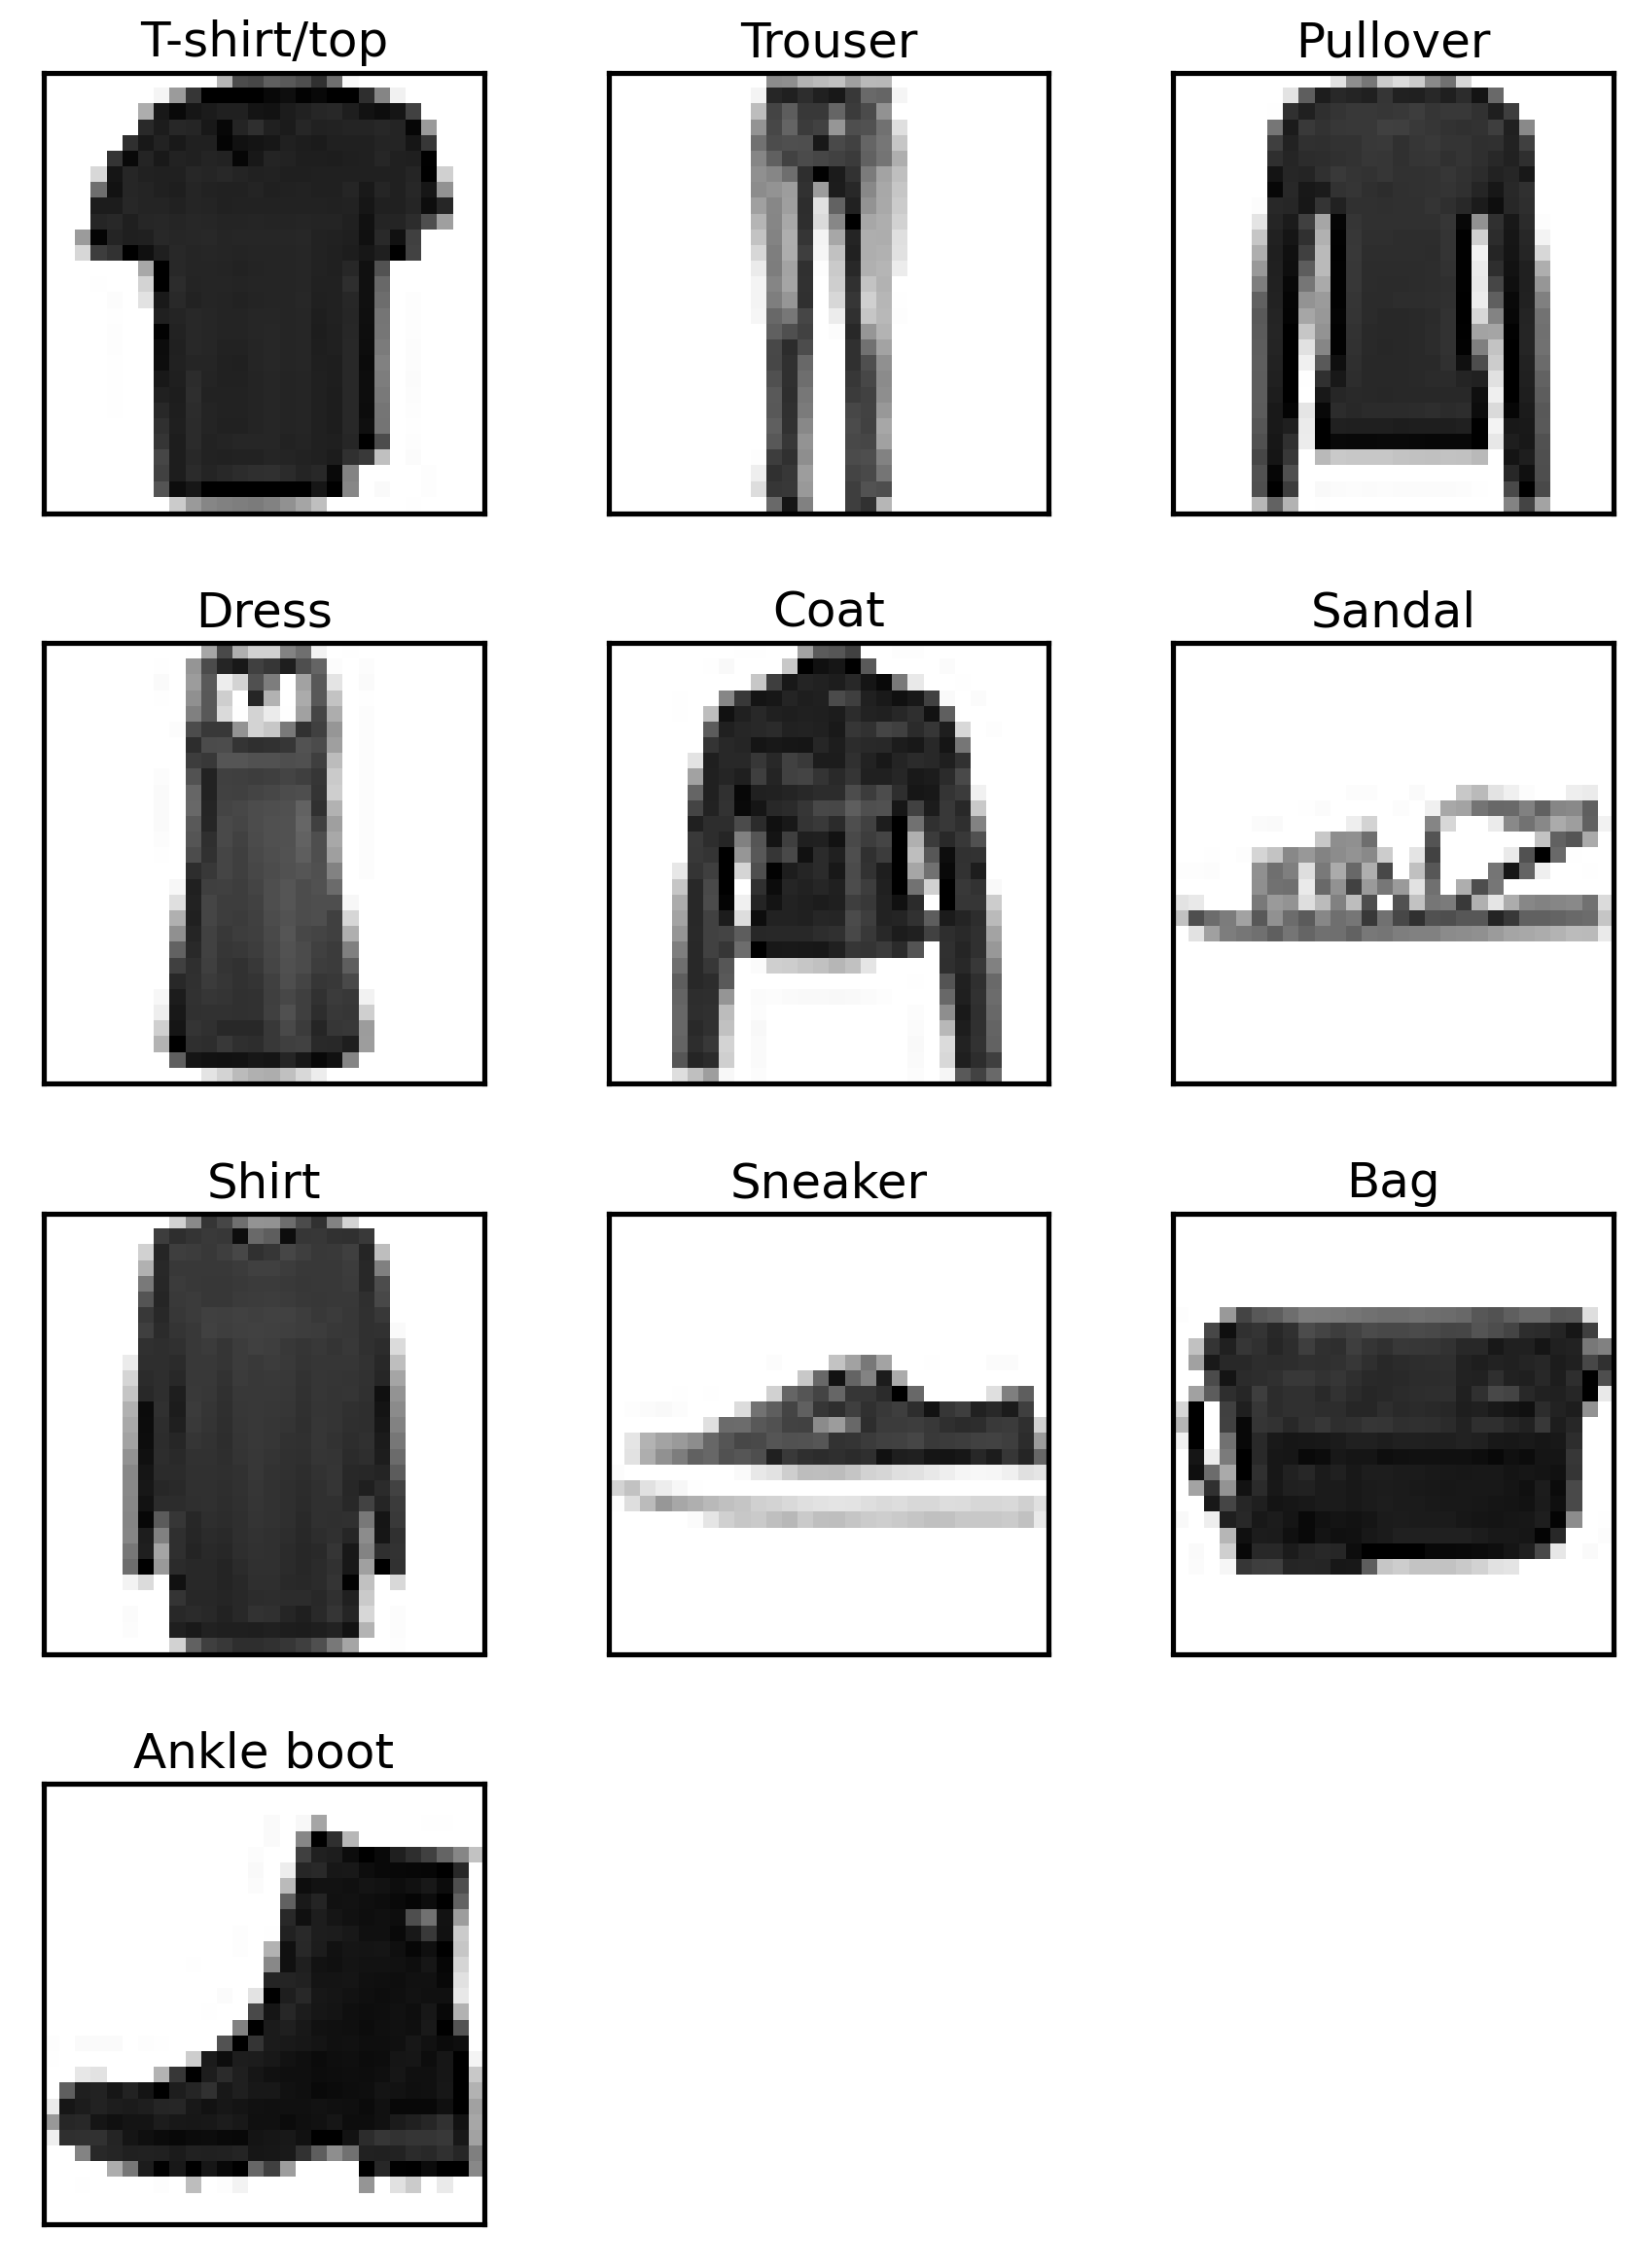

In [4]:
# This cell is plotting a random sample from each class.

n = classes.shape[0]
ncols = 3
nrows = math.ceil(n/ncols)

plt.figure(figsize=[3*ncols, 3*nrows])
for idx, cl in classes['label'].iteritems():
    plt.subplot(nrows, ncols, idx+1)
    
    img = train_x.loc[train_y['label'] == idx].sample(1)
    img = img.values.reshape(28, 28)
    plt.imshow(img, cmap='binary')
    
    plt.title(classes.loc[idx, 'label'])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()
plt.show()

# Step 3: Data Preprocessing

Next step is to transform the dataset for training. You are free to do any preprocesing that you would like.
Here are some suggestions that might or might not be useful for your model:
* standard scaling of the feature variables
* one-hot-encoding of the target variable
* reshaping the feature variables from 1D to 2D

And relevant documentation:
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

# Step 4: Building and training

Here comes the most challenging part. Are you ready to unleash the power of neural networks?
You can refer to the slides and discussion in the first lecture on hyperparameter optimization, random search, and greedy search.

In [5]:
# Enter your code here.
# You can add cells directly below this one too.

# Step 5: Saving the model and predictions

Save your predictions on the Score segment as a Pandas data frame into a variable named `score_y_hat`.

The expected shape of the submitted data frame is `(7000, 10)`, where each column is the probability for each class. The sum of probabilities have to add up to 1. The order of the column has to match the `classes` data frame defined above.

Finally, the data frame needs to have string column names in order to be saved as a Parquet file. If you convert a NumPy array to Pandas data frame, column names will be integers, but you can replace the columns names. There was a similar example of this in the notebook from the first assignment.

In order to verify that your score_y_hat has the right shape and column names,
you can run the following cell.

In [9]:
# score_y_hat.shape, score_y_hat.columns

In [11]:
# Once you are ready to make the graded submission,
# run the model on the score segment,
# and save the results as a Parquet file:

# import os 
# model_dir = 'fashionnet_model'
# os.makedirs(model_dir, exist_ok=True)

# score_y_hat.to_parquet(f'{model_dir}/score_y_hat.parquet')

# Next, let's save the model's definition.
# import json
# with open(f'{model_dir}/keras_model.json', 'w') as f:
#    f.write(json.dumps(json.loads(model.to_json()), indent=True))

# Finally, let's save the learned parameters.
# model.save_weights(f"{model_dir}/keras_parameters.h5")

# You now have the following files to be submitted:
# 1. This notebook and any other Python code you used to train the final model.
# 2. keras_model.json -- the model's definition
# 3. keras_parameters.json -- the model's trained parameters
# 4. score_y_hat.parquet - the model's output on the score dataset